# **Analisis Sentimen Kepuasan Pengguna Aplikasi Identitas Kependudukan Digital (IKD) di Play Store**

oleh Ma'mur Zaky Nurrokhman

## Import Library

In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Exploratory Data Analysis (EDA)

### Dataset Ulasan Aplikasi IKD di Play Store

In [2]:
# import dataset ulasan aplikasi IKD di Play Store

df_ikd_play_store = pd.read_csv('../../data/data_review_aplikasi_ikd_play_store.csv')
df_ikd_play_store

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,81b52f47-491c-4582-b059-40be372f36f3,Habibun Nazar,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi menyusahkan. dimana2 fungsi software ...,1,42,1.2.2,2024-03-14 12:58:56,NaN,NaN,1.2.2
1,a1781cbf-278f-49db-9a2d-61f43cab0b1b,AutoSport RedLine,https://play-lh.googleusercontent.com/a/ACg8oc...,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1,37,1.2.2,2024-02-26 08:21:08,NaN,NaN,1.2.2
2,fc068e18-efa1-4c28-a97b-c41481ba7252,Annisa Kurniawati,https://play-lh.googleusercontent.com/a-/ALV-U...,"Harus dibuka pake WiFi, kalo pake paket data p...",1,834,1.2.2,2024-01-06 20:59:10,NaN,NaN,1.2.2
3,3944fe8c-73cb-4252-b2eb-d6dd356a6805,Wawan Ina,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi nya sangat sangat tdk membantu, saat ...",1,688,1.2.2,2024-02-20 18:22:08,NaN,NaN,1.2.2
4,3440918f-bd37-45ca-89ed-6ecae9ae3fe8,Rahwadi Putraluwu,https://play-lh.googleusercontent.com/a/ACg8oc...,Sudah login berkali-kali tetap saja yg muncul ...,1,562,1.2.2,2024-01-31 17:19:20,NaN,NaN,1.2.2
...,...,...,...,...,...,...,...,...,...,...,...
5117,7fcdee1d-105c-4e7d-9009-ce433a9e80ae,Ismail Is,https://play-lh.googleusercontent.com/a-/ALV-U...,Terimakasih baoak durjen atas aplikasi ikdnya ...,5,0,1.2.2,2024-01-04 10:33:49,NaN,NaN,1.2.2
5118,bb1be052-c18c-4a82-baf2-ed0fb34e98aa,Inayah Safitri,https://play-lh.googleusercontent.com/a/ACg8oc...,semoga aplikasi lebih baik,5,0,1.2.2,2024-01-04 10:21:41,NaN,NaN,1.2.2
5119,a8629511-0d10-41ae-ab49-604c2f49d818,Kholidwalid Silver,https://play-lh.googleusercontent.com/a/ACg8oc...,Semoga lebih baik,5,0,1.2.2,2024-01-04 09:44:45,NaN,NaN,1.2.2
5120,369db5d1-2531-4090-bb80-d3918ad7c53e,Fajri Hz,https://play-lh.googleusercontent.com/a-/ALV-U...,"SAYA PAKAI DATA KARTU TRI CUMA MUTER2 DOANG, P...",5,0,1.2.2,2024-01-04 09:34:00,NaN,NaN,1.2.2


In [3]:
# menampilkan informasi dari dataframe

df_ikd_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              5122 non-null   object 
 1   userName              5122 non-null   object 
 2   userImage             5122 non-null   object 
 3   content               5122 non-null   object 
 4   score                 5122 non-null   int64  
 5   thumbsUpCount         5122 non-null   int64  
 6   reviewCreatedVersion  4336 non-null   object 
 7   at                    5122 non-null   object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            4336 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 440.3+ KB


### Dataset Ulasan Aplikasi IKD di App Store

In [4]:
# import dataset ulasan aplikasi IKD di App Store

df_ikd_app_store = pd.read_csv('../../data/data_review_aplikasi_ikd_app_store.csv')
df_ikd_app_store

,date,review,rating,isEdited,userName,title
0,2023-10-10 06:47:32,"Admin, mohon bantuan. saya tidak bisa buka dok...",3,False,usergege,Tidak bisa buka dokumen kependudukan
1,2023-08-04 08:51:45,Seriusan apanya yang online kalo tetep disuruh...,1,False,"Ganti Nama, jadi entaraja",Aplikasi Tolol
2,2023-08-23 03:20:45,Katanya digital tapi masih diharuskan datang k...,1,False,Nakam2323,Sulit
3,2023-08-08 13:50:50,"Tolong yg bener lah , masa online tapi disuruh...",1,False,4swu,Kerja setengah setengah
4,2023-10-05 07:55:47,Apa cuma aku di sini yang kalau klik dokumen m...,1,False,Ikhsan Siahaan,ERROR
...,...,...,...,...,...,...
359,2024-02-05 17:37:03,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1,False,m4lskutt,MEMPERSULIT
360,2024-04-22 19:28:43,Apk ga guna maksudnya gimna masak login aja ga...,2,False,undor undor,Belulok
361,2023-10-08 12:07:57,WKWKWKWK KATANYA ONLINE TP DISURUH SCAN QR KE ...,1,False,Tommmm96s,Aplikasi gajelas
362,2023-06-07 01:34:18,"Sangat membantu pelayanan , bintang 100000000000",5,False,dyatrii,Mantap


In [5]:
df_ikd_app_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      364 non-null    object
 1   review    364 non-null    object
 2   rating    364 non-null    int64 
 3   isEdited  364 non-null    bool  
 4   userName  364 non-null    object
 5   title     364 non-null    object
dtypes: bool(1), int64(1), object(4)
memory usage: 14.7+ KB


## Data Preprocessing

In [6]:
# menghapus atribut-atribut yang tidak digunakan pada dataset review aplikasi IKD di Play Store

df_ikd_play_store.drop(columns=['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion'], inplace=True)
df_ikd_play_store

,content,score
0,Aplikasi menyusahkan. dimana2 fungsi software ...,1
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1
2,"Harus dibuka pake WiFi, kalo pake paket data p...",1
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",1
4,Sudah login berkali-kali tetap saja yg muncul ...,1
...,...,...
5117,Terimakasih baoak durjen atas aplikasi ikdnya ...,5
5118,semoga aplikasi lebih baik,5
5119,Semoga lebih baik,5
5120,"SAYA PAKAI DATA KARTU TRI CUMA MUTER2 DOANG, P...",5


In [7]:
# mengubah nama atribut

df_ikd_play_store.rename(columns={'content':'review','score':'sentiment'}, inplace=True)
df_ikd_play_store

,review,sentiment
0,Aplikasi menyusahkan. dimana2 fungsi software ...,1
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1
2,"Harus dibuka pake WiFi, kalo pake paket data p...",1
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",1
4,Sudah login berkali-kali tetap saja yg muncul ...,1
...,...,...
5117,Terimakasih baoak durjen atas aplikasi ikdnya ...,5
5118,semoga aplikasi lebih baik,5
5119,Semoga lebih baik,5
5120,"SAYA PAKAI DATA KARTU TRI CUMA MUTER2 DOANG, P...",5


In [8]:
# menghapus atriibut-atribut yang tidak digunakan pada dataset revieww aplikasi IKD di App Store

df_ikd_app_store.drop(columns=['date', 'isEdited', 'userName', 'title'], inplace=True)
df_ikd_app_store

,review,rating
0,"Admin, mohon bantuan. saya tidak bisa buka dok...",3
1,Seriusan apanya yang online kalo tetep disuruh...,1
2,Katanya digital tapi masih diharuskan datang k...,1
3,"Tolong yg bener lah , masa online tapi disuruh...",1
4,Apa cuma aku di sini yang kalau klik dokumen m...,1
...,...,...
359,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1
360,Apk ga guna maksudnya gimna masak login aja ga...,2
361,WKWKWKWK KATANYA ONLINE TP DISURUH SCAN QR KE ...,1
362,"Sangat membantu pelayanan , bintang 100000000000",5


In [9]:
# mengubah nama atribut

df_ikd_app_store.rename(columns={'rating':'sentiment'}, inplace=True)
df_ikd_app_store

,review,sentiment
0,"Admin, mohon bantuan. saya tidak bisa buka dok...",3
1,Seriusan apanya yang online kalo tetep disuruh...,1
2,Katanya digital tapi masih diharuskan datang k...,1
3,"Tolong yg bener lah , masa online tapi disuruh...",1
4,Apa cuma aku di sini yang kalau klik dokumen m...,1
...,...,...
359,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1
360,Apk ga guna maksudnya gimna masak login aja ga...,2
361,WKWKWKWK KATANYA ONLINE TP DISURUH SCAN QR KE ...,1
362,"Sangat membantu pelayanan , bintang 100000000000",5


In [10]:
# menggabungkan kedua dataset menjadi satu dataframe

df = pd.concat([df_ikd_play_store, df_ikd_app_store]).reset_index()
df

,index,review,sentiment
0,0,Aplikasi menyusahkan. dimana2 fungsi software ...,1
1,1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1
2,2,"Harus dibuka pake WiFi, kalo pake paket data p...",1
3,3,"Aplikasi nya sangat sangat tdk membantu, saat ...",1
4,4,Sudah login berkali-kali tetap saja yg muncul ...,1
...,...,...,...
5481,359,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1
5482,360,Apk ga guna maksudnya gimna masak login aja ga...,2
5483,361,WKWKWKWK KATANYA ONLINE TP DISURUH SCAN QR KE ...,1
5484,362,"Sangat membantu pelayanan , bintang 100000000000",5


In [11]:
# menghapus atribut index

df.drop(columns=['index'], inplace=True)
df

,review,sentiment
0,Aplikasi menyusahkan. dimana2 fungsi software ...,1
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1
2,"Harus dibuka pake WiFi, kalo pake paket data p...",1
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",1
4,Sudah login berkali-kali tetap saja yg muncul ...,1
...,...,...
5481,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1
5482,Apk ga guna maksudnya gimna masak login aja ga...,2
5483,WKWKWKWK KATANYA ONLINE TP DISURUH SCAN QR KE ...,1
5484,"Sangat membantu pelayanan , bintang 100000000000",5


In [12]:
# mengelompokan sentimen berdasarkan jumlah rating

print("0 = Negatif")
print("1 = Positif")

df.replace([1,2,3], 0, inplace=True)
df.replace([4,5], 1, inplace=True)
df

0 = Negatif
1 = Positif


,review,sentiment
0,Aplikasi menyusahkan. dimana2 fungsi software ...,0
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,0
2,"Harus dibuka pake WiFi, kalo pake paket data p...",0
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",0
4,Sudah login berkali-kali tetap saja yg muncul ...,0
...,...,...
5481,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",0
5482,Apk ga guna maksudnya gimna masak login aja ga...,0
5483,WKWKWKWK KATANYA ONLINE TP DISURUH SCAN QR KE ...,0
5484,"Sangat membantu pelayanan , bintang 100000000000",1


In [13]:
# menampilkan informasi dari dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5486 non-null   object
 1   sentiment  5486 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 85.8+ KB


In [14]:
# menampilkan jumlah data yang hilang (missing value)

df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [15]:
# melakukan teknik case folding untuk mengubah semua huruf menjadi lower case

def lower(text):
    text = text.lower() # mengubah ke lower case
    return text

df['review'] = df['review'].apply(lower)
df

,review,sentiment
0,aplikasi menyusahkan. dimana2 fungsi software ...,0
1,sy sangat kecewa aplikasi yang buruk.. selesai...,0
2,"harus dibuka pake wifi, kalo pake paket data p...",0
3,"aplikasi nya sangat sangat tdk membantu, saat ...",0
4,sudah login berkali-kali tetap saja yg muncul ...,0
...,...,...
5481,"online darimana ujung"" nya disuruh dteng ke du...",0
5482,apk ga guna maksudnya gimna masak login aja ga...,0
5483,wkwkwkwk katanya online tp disuruh scan qr ke ...,0
5484,"sangat membantu pelayanan , bintang 100000000000",1


In [16]:
# menghapus tanda baca dan angka

def remove_punctuation_and_number(text):
    text = text.translate(str.maketrans("","",string.punctuation + string.digits))
    return text

df['review'] = df['review'].apply(remove_punctuation_and_number)
df

,review,sentiment
0,aplikasi menyusahkan dimana fungsi software it...,0
1,sy sangat kecewa aplikasi yang buruk selesai d...,0
2,harus dibuka pake wifi kalo pake paket data pr...,0
3,aplikasi nya sangat sangat tdk membantu saat i...,0
4,sudah login berkalikali tetap saja yg muncul j...,0
...,...,...
5481,online darimana ujung nya disuruh dteng ke duc...,0
5482,apk ga guna maksudnya gimna masak login aja ga...,0
5483,wkwkwkwk katanya online tp disuruh scan qr ke ...,0
5484,sangat membantu pelayanan bintang,1


In [17]:
# menghapus whitespace pada teks

def remove_whitespace(text):
    correct = str(text)
    correct = re.sub(r"//t",r"\t", correct)
    correct = re.sub(r"( )\1+",r"\1", correct)
    correct = re.sub(r"(\n)\1+",r"\1", correct)
    correct = re.sub(r"(\r)\1+",r"\1", correct)
    correct = re.sub(r"(\t)\1+",r"\1", correct)
    return correct.strip()

df['review'] = df['review'].apply(remove_whitespace)
df

,review,sentiment
0,aplikasi menyusahkan dimana fungsi software it...,0
1,sy sangat kecewa aplikasi yang buruk selesai d...,0
2,harus dibuka pake wifi kalo pake paket data pr...,0
3,aplikasi nya sangat sangat tdk membantu saat i...,0
4,sudah login berkalikali tetap saja yg muncul j...,0
...,...,...
5481,online darimana ujung nya disuruh dteng ke duc...,0
5482,apk ga guna maksudnya gimna masak login aja ga...,0
5483,wkwkwkwk katanya online tp disuruh scan qr ke ...,0
5484,sangat membantu pelayanan bintang,1


In [18]:
# tokenizing teks

def tokenizing(text):
    text = word_tokenize(text)
    return text

df['review'] = df['review'].apply(tokenizing)
df

,review,sentiment
0,"[aplikasi, menyusahkan, dimana, fungsi, softwa...",0
1,"[sy, sangat, kecewa, aplikasi, yang, buruk, se...",0
2,"[harus, dibuka, pake, wifi, kalo, pake, paket,...",0
3,"[aplikasi, nya, sangat, sangat, tdk, membantu,...",0
4,"[sudah, login, berkalikali, tetap, saja, yg, m...",0
...,...,...
5481,"[online, darimana, ujung, nya, disuruh, dteng,...",0
5482,"[apk, ga, guna, maksudnya, gimna, masak, login...",0
5483,"[wkwkwkwk, katanya, online, tp, disuruh, scan,...",0
5484,"[sangat, membantu, pelayanan, bintang]",1


In [19]:
# menghapus stop words dengan Sastrawi

factory = StopWordRemoverFactory()
stopword_sastrawi = factory.get_stop_words()

def remove_stopwords_with_sastrawi(text):
    text = [word for word in text if word not in stopword_sastrawi]
    return text

df['review'] = df['review'].apply(remove_stopwords_with_sastrawi)
df

,review,sentiment
0,"[aplikasi, menyusahkan, dimana, fungsi, softwa...",0
1,"[sy, kecewa, aplikasi, buruk, selesai, daftark...",0
2,"[dibuka, pake, wifi, kalo, pake, paket, data, ...",0
3,"[aplikasi, tdk, membantu, membukanya, dukcapil...",0
4,"[login, berkalikali, yg, muncul, jaringan, sta...",0
...,...,...
5481,"[online, darimana, ujung, disuruh, dteng, duca...",0
5482,"[apk, ga, maksudnya, gimna, masak, login, aja,...",0
5483,"[wkwkwkwk, online, tp, disuruh, scan, qr, dukc...",0
5484,"[membantu, pelayanan, bintang]",1


In [20]:
# melakukan stemming dengan Sastrawi

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = [stemmer.stem(token) for token in text]
    return text

df['review'] = df['review'].apply(stemming)
df

,review,sentiment
0,"[aplikasi, susah, mana, fungsi, software, muda...",0
1,"[sy, kecewa, aplikasi, buruk, selesai, daftar,...",0
2,"[buka, pake, wifi, kalo, pake, paket, data, pr...",0
3,"[aplikasi, tdk, bantu, buka, dukcapil, wajib, ...",0
4,"[login, berkalikali, yg, muncul, jaring, stabi...",0
...,...,...
5481,"[online, darimana, ujung, suruh, dteng, ducakp...",0
5482,"[apk, ga, maksud, gimna, masak, login, aja, ga...",0
5483,"[wkwkwkwk, online, tp, suruh, scan, qr, dukcap...",0
5484,"[bantu, layan, bintang]",1


In [21]:
# Menggabungkan kata-kata menjadi satu kalimat per baris

corpus = []

for i in range(len(df['review'])):
    word = df['review'][i]
    row = ' '.join(word)
    corpus.append(row)

df['review'] = corpus
df

,review,sentiment
0,aplikasi susah mana fungsi software mudah ruma...,0
1,sy kecewa aplikasi buruk selesai daftar bukati...,0
2,buka pake wifi kalo pake paket data pribadi ga...,0
3,aplikasi tdk bantu buka dukcapil wajib mengins...,0
4,login berkalikali yg muncul jaring stabil jari...,0
...,...,...
5481,online darimana ujung suruh dteng ducakpil apu...,0
5482,apk ga maksud gimna masak login aja ga gimna l...,0
5483,wkwkwkwk online tp suruh scan qr dukcapil apus...,0
5484,bantu layan bintang,1


Jumlah kata pada dataset adalah 386719 kata


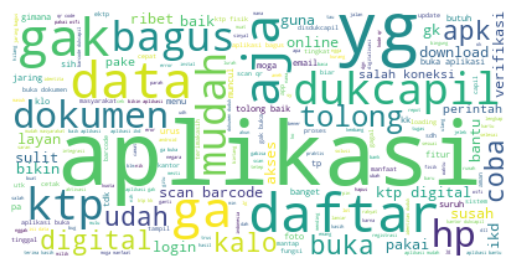

In [22]:
# menampilkan frekuensi kemunculan kata menggunakan wordcloud

words = " ".join(review for review in df['review'])
print(f'Jumlah kata pada dataset adalah {len(words)} kata')

wordcloud = WordCloud(background_color='white').generate(text=words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# membagi atribut menjadi features (X) dan label (y)

X = df['review']
y = df['sentiment']

Keterangan:
0 = Negatif
1 = Positif


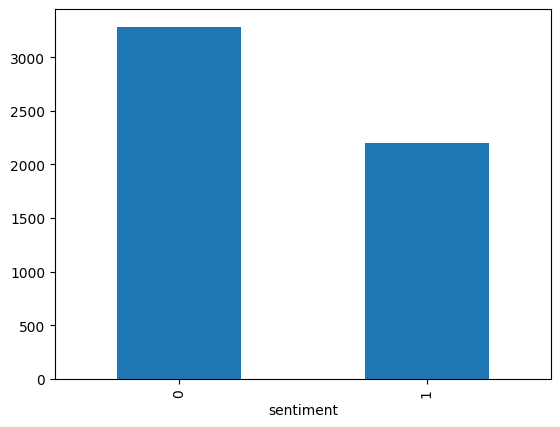

In [24]:
# menampilkan grafik jumlah data pada kolom sentiment

y.value_counts().plot(kind='bar')
print('Keterangan:')
print('0 = Negatif')
print('1 = Positif')
plt.show()

In [25]:
# melakukan pembobotan feature dengan TF-IDF

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)
X_tfidf

<5486x7026 sparse matrix of type '<class 'numpy.float64'>'
	with 53991 stored elements in Compressed Sparse Row format>

In [26]:
# menyeimbangkan data berdasarkan atribut sentiment atau label (y)

oversampler = SMOTE()
X_tfidf_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)

Keterangan:
0 = Negatif
1 = Positif


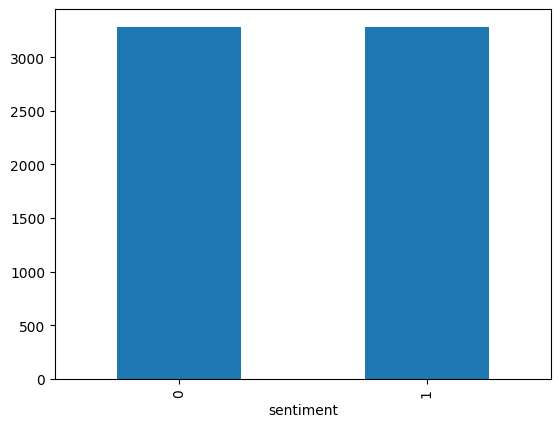

In [27]:
# menampilkan kembali grafik jumlah data pada kolom sentiment

y_resampled.value_counts().plot(kind='bar')
print('Keterangan:')
print('0 = Negatif')
print('1 = Positif')
plt.show()

## Training Model

In [28]:
# membagi data menjadi data latih (training data) dan data uji (test data)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_resampled, y_resampled, test_size=0.2, random_state=42)

In [29]:
# deklarasi parameter untuk hyperparameter tuning

param_space = {
    'C': (1e-3, 1e+3, 'log-uniform'),
    'gamma': (1e-3, 1e+3, 'log-uniform'),
    'kernel': ['linear', 'rbf', 'poly'],
}

In [30]:
# inisiasi Bayesian Optimization

model = BayesSearchCV(
    estimator=SVC(),
    search_spaces=param_space,
    n_iter=32,
    cv=3
)

In [31]:
model.fit(X_train, y_train)

print(f'val. score: {model.best_score_}')
print(f'test score: {model.score(X_test, y_test)}')

val. score: 0.8483061864192413
test score: 0.8789954337899544


In [32]:
# Get best hyperparameters
best_params = model.best_params_
print('Best Parameters:', best_params)

Best Parameters: OrderedDict({'C': 1.7350687048148359, 'gamma': 0.4933306852188392, 'kernel': 'rbf'})


In [33]:
# Create an SVM classifier with the best parameters
best_svc_model = SVC(**best_params)

# Fit the classifier on the training data
best_svc_model.fit(X_train, y_train)

# Predict on the test data
best_svc_pred = best_svc_model.predict(X_test)

## Evaluation

In [34]:
# memeriksa overfit/underfit

training_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print('Training accuracy :', training_accuracy)
print('Test accuracy :', test_accuracy)
print('Difference :', training_accuracy - test_accuracy)

Training accuracy : 0.953368861819566
Test accuracy : 0.8789954337899544
Difference : 0.07437342802961167


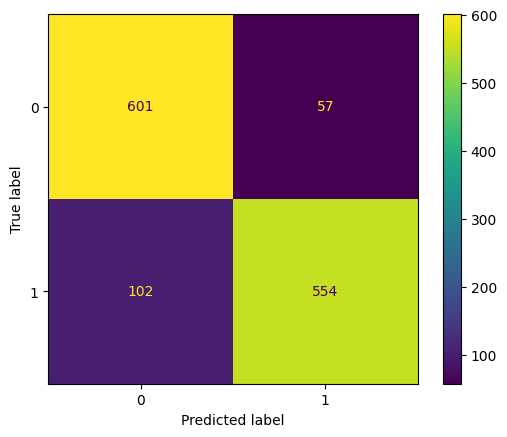

In [35]:
# menampilkan confusion matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [36]:
# melihat hasil laporan klasifikasi

print(classification_report(y_test, y_pred, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.8549    0.9134    0.8832       658
           1     0.9067    0.8445    0.8745       656

    accuracy                         0.8790      1314
   macro avg     0.8808    0.8789    0.8788      1314
weighted avg     0.8808    0.8790    0.8788      1314

